Text Vectorization
1. Qualitative Approach: importance & prevalence based on own jugdement.
2. Quantitative Approach: TD-IDF

Goal: to identify terms from my movie reviews that are important to be included in the final corpus for clustering and classification tasks.

Steps:
1. Look at key terms in my documents and select at least three for investigation.
2. Look at related key terms within the tf-idf list.
3. Look for related terms in other documents.
4. Roughly chunk together the various terms that seem more-or-less related; this is not to be comprehensive, but rather to identify major themes/topics that seem to be addressed.


#### Part 0. Load resources

In [3]:

try:
  import ipynb
except:
  !pip install ipynb
  import ipynb

In [4]:
try:
  import rake_nltk
except:
  !pip install rake_nltk
  import rake_nltk

try:
  import keras
except:
  !pip install keras
  import keras

try:
  import tensorflow
except:
  !pip install tensorflow
  import tensorflow
!pip install dandelion-eu
!pip install ipynb

  Preparing metadata (setup.py) ... done
  Created wheel for dandelion-eu: filename=dandelion_eu-0.3.3-py3-none-any.whl size=14393 sha256=fd6f7b2fbee95933bb7b7ddd4127bbec5822072a9d538ef966afd96fd451eb5c
  Stored in directory: /root/.cache/pip/wheels/0b/16/f1/35119c186b71e2175be4c859f29ff44b81b230c8a45c5c0541
Successfully built dandelion-eu


In [5]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-

In [1]:
import pandas as pd


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from rake_nltk import Rake
import re
import unicodedata
import pandas as pd
import os
from google.colab import drive, userdata
import json
from collections import Counter
from pydantic import BaseModel, Field
from typing import List, Optional, Dict, Any
import ipynb
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.corpora import Dictionary
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from dandelion import DataTXT
import ipynb
import requests


from sklearn.manifold import TSNE
from keras.models import Model
from keras.layers import Input, Dense, Reshape
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
import tensorflow as tf

In [3]:
## load working area
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))

In [6]:
# Pre-process dataset to remove punctuation
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

In [7]:
# Pre-process dataset to lower case it
def lower_case(in_text):
    # Convert to lowercase
    text = in_text.lower()
    return text

In [8]:
# Pre-process dataset to remove tags
def remove_tags(in_text):
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",in_text)
    return text

In [9]:
# Pre-process dataset to remove special characters and digits
def remove_special_chars_and_digits(in_text):
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",in_text)
    return text


In [10]:
# Pre-process dataset to appy Stemming
def apply_stemming(in_text):
    stemmer=PorterStemmer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([stemmer.stem(w) for w in word_list])
    return output

In [11]:
# Pre-process dataset to apply Lemmatization
def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

In [12]:
# Remove stop words
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(in_text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    return filtered_sentence

In [13]:
# Run Phase Machine
def run_phrase_machine(in_text):
    phrases=phrasemachine.get_phrases(in_text)
    return phrases

In [14]:

#Run Rake Keyword Extractor
def run_rake(in_text):
    r = Rake()
    r.extract_keywords_from_text(in_text)
    rake_phrases= r.get_ranked_phrases()
    return rake_phrases

In [15]:
# Run NLTK Tokenizer
def run_nltk_tokenizer(in_text):
    tokens=nltk.word_tokenize(in_text)
    return tokens

In [16]:
# Run NLTK Sentence Tokenizer
def run_nltk_sent_tokenizer(in_corpus):
    sents = nltk.sent_tokenize(in_corpus)
    return sents

In [17]:
#Run word-ngram Tokenizer
def run_nltk_tokenizer_word_ngrams(in_text, ngram_size):
    n_grams = ngrams(nltk.word_tokenize(in_text), ngram_size)
    return [ ' '.join(grams) for grams in n_grams]

In [18]:
#Get Frequ Dist
def get_freq_dist(terms):
    all_counts = dict()
    all_counts[size] = FreqDist(terms)
    return all_counts

In [19]:

###############################################################################
### Processing text into lists
###############################################################################
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    return (docids,titles,text_body)

In [20]:
###############################################################################
### Functions to visualize documents
###############################################################################
def clean_doc(doc):
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    return tokens

def process_corpus(data):

    #create empty list to store text documents titles
    titles=[]

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)

    #Note: the text_body is the unprocessed list of documents read directly form
    #the csv.

    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)

    #Note: the processed_text is the PROCESSED list of documents read directly form
    #the csv.  Note the list of words is separated by commas.


    #stitch back together individual words to reform body of text
    final_processed_text=[]

    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)

    return titles, final_processed_text, processed_text

def run_doc2vec(final_processed_text, processed_text):
    #create doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
    model = Doc2Vec(documents, vector_size=1000, window=2, min_count=1, workers=4)
    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

    return doc2vec_df

def run_word2vec(processed_text):

    #word to vec model
    #model_w2v = Word2Vec(processed_text, size=100, window=5, min_count=1, workers=4)
    model_w2v = Word2Vec(processed_text, vector_size=100, window=5, min_count=1, workers=4)


    labels = []
    tokens = []

    for word in model_w2v.wv.index_to_key:
        tokens.append(model_w2v.wv[word])
        labels.append(word)


    return labels, tokens, model_w2v





def plot_doc2vec(doc2vec_df, titles, perplexity = 2):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=2500, random_state=23)

    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(titles[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def plot_word2vec(model, labels, tokens):
    # Convert tokens (vectors) to a NumPy array
    tokens_array = np.array(tokens)

    # Run TSNE
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens_array)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [21]:
def check_terms_in_df(df, term_list, alias_terms = {}):
  results = {}
  for f in df['Submission File Name']:
    docfile = f
    reference = f[4:9].replace("_", "")
    results[reference] = {}
    for t in term_list:
      text = df['MovieReview_normalized'].loc[df['Submission File Name']==f].to_list()[0]
      if t in text:
        results[reference][t] = text.count(t)
      else:
        results[reference][t] = 0


  df_results = pd.DataFrame.from_dict(results)
  df_results['TotalTerms'] = df_results.sum(axis=1, numeric_only=True)

  df_results.sort_values(by='TotalTerms', ascending = False, inplace=True)
  df_results = df_results.reset_index()
  df_results.rename(columns={'index':'Term'}, inplace=True)
  df_results = df_results.fillna(0)
  if alias_terms != {}:
    df_results['alias_terms'] = df_results['Term'].apply(lambda x: alias_terms[x] if x in alias_terms else '')
  df_output = df_results.loc[df_results['TotalTerms']>=1]
  return df_output

In [22]:
def get_cleaned_text(text):
  """simple data cleaning - remove the special characters and convert to lower case"""
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  cleaned_text = cleaned_text.lower()
  cleaned_text = cleaned_text.rstrip()
  return cleaned_text

def get_lemmatize_text(text, text_type = str):
  lemmatizer = WordNetLemmatizer()
  if text_type == str:
    text = text.split()
  return [lemmatizer.lemmatize(word) for word in text]

def get_stem_text(text, text_type = str):
  stemmer = PorterStemmer()
  if text_type == str:
    text = text.split()
  return [stemmer.stem(word) for word in text]

def preprocess_text(text, lemma = True, stem = False, custom_stopwords = ['movie', 'film'], output = str):
  stop_words = set(stopwords.words('english'))
  if custom_stopwords != []:
    stop_words.update(custom_stopwords)
  if type(text) == str:
    text_string = [text.split(".")]
  else:
    text_string = text

  cleaned_sentences = []
  for i,sentences in enumerate(text_string):
    for j,sentence in enumerate(sentences):
      if lemma:
        output_type = list if type(output) == list else str
        sentence = get_lemmatize_text(sentence, text_type = output_type)
      if stem:
        output_type = list if type(output) == list else str
        sentence = get_stem_text(sentence, text_type = output_type)


      cleaned_s = [get_cleaned_text(token) for token in sentence if token not in stop_words and len(token)>2]
      cleaned_sentences.append(cleaned_s)

  flat_list = [item for sublist in cleaned_sentences for item in sublist]
  if output == list:
    return flat_list
  else:
    ## expects words in a single phrase
    phrase = " ".join(flat_list)
    phrase = re.sub(r'\s+', ' ', phrase)
    tokens = get_cleaned_text(phrase)  # Tokenize and remove punctuation
    return tokens

In [157]:
###############################################################################
### Setup path to file, get the corpus, set up
###############################################################################
path_to_file='https://raw.githubusercontent.com/minjeoungneev/MSDS453_NLP/refs/heads/main/PYK_MovieReview_v2.csv'
df = pd.read_csv(path_to_file)
print(df.head())

   Doc_ID             DSI_Title  Submission File Name Student Name  \
0     261  PYK_Doc1_Equilibrium  PYK_Doc1_Equilibrium          PYK   
1     262  PYK_Doc2_Equilibrium  PYK_Doc2_Equilibrium          PYK   
2     263  PYK_Doc3_Equilibrium  PYK_Doc3_Equilibrium          PYK   
3     264  PYK_Doc4_Equilibrium  PYK_Doc4_Equilibrium          PYK   
4     265  PYK_Doc5_Equilibrium  PYK_Doc5_Equilibrium          PYK   

  Genre of Movie Review Type (pos or neg)  Movie Title  \
0         Sci-Fi                 Positive  Equilibrium   
1         Sci-Fi                 Positive  Equilibrium   
2         Sci-Fi                 Positive  Equilibrium   
3         Sci-Fi                 Positive  Equilibrium   
4         Sci-Fi                 Positive  Equilibrium   

                                                Text  
0  In the first years of the 21st century, a thir...  
1  Equilibrium is my favorite movie of 2002. It f...  
2  If I was to explain this movie to someone in o...  
3  Pilfere

In [158]:
stem_ind = False
lemma_ind = True

In [159]:
df['MovieReview_normalized'] = df['Text'].apply(get_cleaned_text)
df['MovieReview_normalized2'] = df['Text'].apply(preprocess_text)

In [160]:
df.head()

,Doc_ID,DSI_Title,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title,Text,MovieReview_normalized,MovieReview_normalized2
0,261,PYK_Doc1_Equilibrium,PYK_Doc1_Equilibrium,PYK,Sci-Fi,Positive,Equilibrium,"In the first years of the 21st century, a thir...",in the first years of the 21st century a third...,first year 21st century third world war broke ...
1,262,PYK_Doc2_Equilibrium,PYK_Doc2_Equilibrium,PYK,Sci-Fi,Positive,Equilibrium,Equilibrium is my favorite movie of 2002. It f...,equilibrium is my favorite movie of 2002 it fe...,equilibrium favorite 2002 feel uncomfortable e...
2,263,PYK_Doc3_Equilibrium,PYK_Doc3_Equilibrium,PYK,Sci-Fi,Positive,Equilibrium,If I was to explain this movie to someone in o...,if i was to explain this movie to someone in o...,explain someone one sentence would this george...
3,264,PYK_Doc4_Equilibrium,PYK_Doc4_Equilibrium,PYK,Sci-Fi,Positive,Equilibrium,Pilfered though it is from many superior (and ...,pilfered though it is from many superior and n...,pilfered though many superior and notsosuperio...
4,265,PYK_Doc5_Equilibrium,PYK_Doc5_Equilibrium,PYK,Sci-Fi,Positive,Equilibrium,"""Equilibrium"" would be a mindless action pictu...",equilibrium would be a mindless action picture...,equilibrium would mindless action picture exce...


#### Part1. Review Key Terms

In [35]:
limited_terms = {'emotion': {'original_terms': ['anti-emotion', 'emotion', 'emotional', 'emotional-repression', 'emotionally', 'emotionless', 'emotions', 'feelings'],  'count': 8},
 'equilibrium': {'original_terms': ['equilbrium','equilibrium'],  'count': 2},
 'john preston': {'original_terms': ['john', 'preston'],  'count': 2},
 'christian bale': {'original_terms': ['bale', 'christian'], 'count':2},
  'suppress': {'original_terms': ['compression', 'emotional-repression', 'oppressive','suppress'],  'count': 4},
 'people': {'original_terms': ['citizens', 'human', 'man', 'mankind', 'people', 'women', 'workers'],   'count': 7},
 'actor': {'original_terms': ['action', 'actor', 'actors', 'actresses'],   'count': 4},
'director':{'original_terms': ['director', 'directors', 'kurt', 'wimmer'],   'count': 4},
 'work':{'original_terms': ['work', 'works'],   'count': 2},
  'world' :{'original_terms': ['world'],   'count': 1}}

alias_terms = {}
for k,v in limited_terms.items():
  for t in v['original_terms']:
    alias_terms[t] = k

print(f'The number of movie terms identified from last week includes {len(alias_terms)} alias references')

processed_list = preprocess_text([alias_terms.values()], lemma_ind,stem_ind, output = list)

The number of movie terms identified from last week includes 35 alias references


In [38]:
## create the combined table that counts the term frequency within the movie reviews
df_limited = check_terms_in_df(df, alias_terms.keys(), alias_terms = alias_terms)
df_limited = df_limited[['Term','alias_terms','Doc1','Doc2','Doc3','Doc4','Doc5','Doc6','Doc7','Doc8','Doc9','Doc10','TotalTerms']]

In [39]:
df_limited

,Term,alias_terms,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,TotalTerms
0,emotion,emotion,3,1,14,7,1,2,5,1,1,19,54
1,man,people,8,7,3,4,4,4,2,2,2,4,40
2,preston,john preston,5,4,4,1,2,4,3,0,0,0,23
3,emotions,emotion,1,1,10,1,1,1,0,0,0,5,20
4,bale,christian bale,2,3,2,2,2,2,1,1,1,2,18
5,world,world,1,2,1,4,3,3,2,1,0,1,18
6,equilibrium,equilibrium,3,3,1,2,3,1,2,0,0,2,17
7,john,john preston,2,1,1,9,1,1,1,0,0,0,16
8,christian,christian bale,1,1,1,2,1,2,1,1,0,2,12
9,action,actor,1,2,1,0,1,3,0,1,2,0,11


In [41]:
aggregated_df = df_limited.groupby('alias_terms')[['Doc1','Doc2','Doc3','Doc4','Doc5','Doc6','Doc7','Doc8','Doc9','Doc10','TotalTerms']].agg(['sum'])


In [42]:
print("\nGrouped by 'alias terms' for each movie review based on term frequency:")


Grouped by 'alias terms' for each movie review based on term frequency:


In [43]:
aggregated_df = aggregated_df.reset_index()
aggregated_df.columns = ['_'.join(col) for col in aggregated_df.columns]
aggregated_df = aggregated_df.sort_values(by='TotalTerms_sum', ascending = False).reset_index(drop=True)
aggregated_df

,alias_terms_,Doc1_sum,Doc2_sum,Doc3_sum,Doc4_sum,Doc5_sum,Doc6_sum,Doc7_sum,Doc8_sum,Doc9_sum,Doc10_sum,TotalTerms_sum
0,emotion,6,2,26,13,2,3,8,3,1,36,100
1,people,13,10,3,4,7,5,2,4,2,10,60
2,john preston,7,5,5,10,3,5,4,0,0,0,39
3,christian bale,3,4,3,4,3,4,2,2,1,4,30
4,director,3,4,3,0,0,3,3,0,3,6,25
5,actor,3,3,1,0,1,3,0,3,5,0,19
6,equilibrium,3,3,1,2,3,1,2,0,1,2,18
7,world,1,2,1,4,3,3,2,1,0,1,18
8,work,2,1,0,2,3,0,0,2,0,0,10
9,suppress,2,1,0,0,0,2,0,0,0,1,6


In [44]:
## transform the count of terms to the top 10 terms
terms_df = aggregated_df[:12].T
terms_df

,0,1,2,3,4,5,6,7,8,9
alias_terms_,emotion,people,john preston,christian bale,director,actor,equilibrium,world,work,suppress
Doc1_sum,6,13,7,3,3,3,3,1,2,2
Doc2_sum,2,10,5,4,4,3,3,2,1,1
Doc3_sum,26,3,5,3,3,1,1,1,0,0
Doc4_sum,13,4,10,4,0,0,2,4,2,0
Doc5_sum,2,7,3,3,0,1,3,3,3,0
Doc6_sum,3,5,5,4,3,3,1,3,0,2
Doc7_sum,8,2,4,2,3,0,2,2,0,0
Doc8_sum,3,4,0,2,0,3,0,1,2,0
Doc9_sum,1,2,0,1,3,5,1,0,0,0


In [46]:
term_list_corr = terms_df.iloc[0].tolist()
term_list_corr
terms_df.drop(['alias_terms_','TotalTerms_sum'], inplace=True)

In [47]:
term_list_corr

['emotion',
 'people',
 'john preston',
 'christian bale',
 'director',
 'actor',
 'equilibrium',
 'world',
 'work',
 'suppress']

In [51]:
## implement the correlation matrix for the term counts in the movie reviews
correlation_matrix = terms_df.corr()

In [201]:
terms_df

,0,1,2,3,4,5,6,7,8,9
Doc1_sum,6,13,7,3,3,3,3,1,2,2
Doc2_sum,2,10,5,4,4,3,3,2,1,1
Doc3_sum,26,3,5,3,3,1,1,1,0,0
Doc4_sum,13,4,10,4,0,0,2,4,2,0
Doc5_sum,2,7,3,3,0,1,3,3,3,0
Doc6_sum,3,5,5,4,3,3,1,3,0,2
Doc7_sum,8,2,4,2,3,0,2,2,0,0
Doc8_sum,3,4,0,2,0,3,0,1,2,0
Doc9_sum,1,2,0,1,3,5,1,0,0,0
Doc10_sum,36,10,0,4,6,0,2,1,0,1


In [52]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.114882,-0.071321,0.364103,0.506800,-0.622676,-0.054382,-0.167530,-0.389127,-0.044403
1,0.114882,1.000000,0.141472,0.522958,0.370462,0.033563,0.674200,-0.047203,0.326637,0.688102
2,-0.071321,0.141472,1.000000,0.513994,-0.250782,-0.295760,0.419674,0.655610,0.263931,0.224872
3,0.364103,0.522958,0.513994,1.000000,0.215353,-0.426798,0.408248,0.600245,0.091287,0.500000
4,0.506800,0.370462,-0.250782,0.215353,1.000000,0.016413,0.164845,-0.461659,-0.737210,0.471084
5,-0.622676,0.033563,-0.295760,-0.426798,0.016413,1.000000,-0.261359,-0.480997,-0.055659,0.274370
6,-0.054382,0.674200,0.419674,0.408248,0.164845,-0.261359,1.000000,0.315063,0.372678,0.280671
7,-0.167530,-0.047203,0.655610,0.600245,-0.461659,-0.480997,0.315063,1.000000,0.391390,0.021437
8,-0.389127,0.326637,0.263931,0.091287,-0.737210,-0.055659,0.372678,0.391390,1.000000,-0.114109
9,-0.044403,0.688102,0.224872,0.500000,0.471084,0.274370,0.280671,0.021437,-0.114109,1.000000


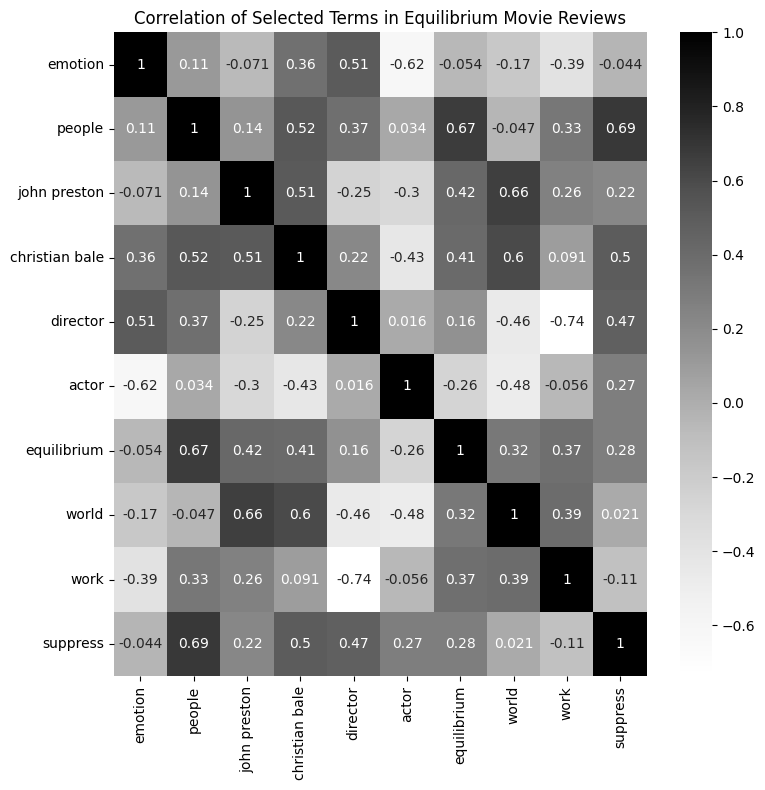

In [200]:
corrleation_heatmap, ax = generate_masked_heatmap(correlation_matrix, term_list=term_list_corr, c = {'masked': False, 'axis_labels':'Limited Terms','title':"Correlation of Selected Terms in Equilibrium Movie Reviews", 'cmap': 'Greys'})

#### Part 2. TF-IDF Evidence

In [147]:
###############################################################################
### Calculates TFIDF
## source: Dimensionality Reduction v7
## author: Jennifer Sleeman
###############################################################################


def get_tfidf_results(text, df = None, top_k_results = None,
                      limited_list = [], custom_vocab = None,
                      c_stop_words = None):
  if c_stop_words != None:
    stopwords = c_stop_words
  else:
    stopwords = 'english'

  if custom_vocab != None:
    vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True,
                               ngram_range=(1,1), norm=None)
  else:
    vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True,
                               ngram_range=(1,1), norm=None,
                                 vocabulary=custom_vocab)
  vectorizer.vocabulary_ = custom_vocab
  transformed_documents = vectorizer.fit_transform(text)

  transformed_documents_as_array = transformed_documents.toarray()
  doc_term_matrix = transformed_documents.todense()
  processed_list = vectorizer.get_feature_names_out()

  doc_term_df = pd.DataFrame(doc_term_matrix,
                               columns=processed_list,
                               index=df.Doc_ID)

  tfidf = pd.DataFrame(doc_term_df.sum().sort_values(ascending=False)).reset_index(drop=False)
  tfidf.columns = ['Term', 'Total TF-IDF']
  tfidf['doc_count'] = tfidf['Term'].apply(lambda x: custom_vocab.dfs[custom_vocab.token2id.get(x)])
  tfidf['mean_tf_idf_scores'] = tfidf['Total TF-IDF']/tfidf['doc_count']
  tfidf['mean_tf_idf_corpus'] = tfidf['Total TF-IDF']/df.shape[0]
  sorted_tfidf = tfidf.sort_values(by='mean_tf_idf_corpus', ascending=False).reset_index(drop=True).round(3)
  if len(limited_list)>0:
    results = sorted_tfidf.loc[sorted_tfidf['Term'].isin(limited_list)]
  else:
    results = sorted_tfidf
  return doc_term_df,results[:top_k_results]

a. entire docs

In [148]:
###############################################################################
### Calculates TFIDF and Saves TFIDF values for terms to a file
###############################################################################
vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(df['MovieReview_normalized2'])
transformed_documents_as_array = transformed_documents.toarray()

#CHANGE THIS PATH TO YOUR OWN
output_filenames ="tf_idf_output"

for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

    # output to a csv using the enumerated value for the filename
    one_doc_as_df.to_csv(output_filenames+"_"+str(df['DSI_Title'].iloc[counter]) + ".csv")

In [149]:
display(one_doc_as_df.head(10))

,term,score
0,emotional,13.795698
1,emotion,13.184537
2,apparently,8.114244
3,dramatic,8.114244
4,woman,8.114244
5,stuff,6.897849
6,feeling,6.424543
7,paranoia,5.409496
8,convey,5.409496
9,hoard,5.409496


b. selected terms in entire docs

In [152]:
filtered_one_doc_df = one_doc_as_df[one_doc_as_df['term'].isin(df_limited['Term'])]
display(filtered_one_doc_df.head(10))

,term,score
0,emotional,13.795698
1,emotion,13.184537
11,feelings,5.409496
20,emotions,4.598566
25,kurt,4.355955
28,human,3.576915
32,wimmer,2.903970
63,compression,2.704748
189,people,2.299283
193,director,2.299283


#### Part 3. scores in each docs relative to entire corpus

In [186]:
# If docs is a Series, convert to list of strings
docs = df['MovieReview_normalized2'].fillna("").astype(str).tolist()

vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, norm=None)
X = vectorizer.fit_transform(docs).toarray()

# Loop through each document row
for i, row in enumerate(X, start=1):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), row))
    df_doc = (
        pd.DataFrame(tf_idf_tuples, columns=['term', 'score'])
        .sort_values(by='score', ascending=False)
        .reset_index(drop=True)
    )

    globals()[f"doc{i}_tfidf"] = df_doc
    print(f"\nTop terms for doc{i}")
    display(df_doc.head(10))



Top terms for doc1


,term,score
0,material,5.409496
1,discovering,5.409496
2,shooting,4.598566
3,help,4.598566
4,soldier,4.023202
5,prestons,4.023202
6,emotion,3.955361
7,preston,3.955361
8,equilibrium,3.602012
9,human,3.576915



Top terms for doc2


,term,score
0,feel,7.153829
1,ive,6.897849
2,humanity,5.409496
3,future,5.365372
4,month,4.598566
5,drug,4.355955
6,clerick,4.023202
7,prestons,4.023202
8,cast,4.023202
9,mind,3.576915



Top terms for doc3


,term,score
0,emotion,14.502991
1,soldier,14.081206
2,warrior,8.114244
3,heavily,6.897849
4,memory,6.897849
5,incredible,6.897849
6,watch,6.897849
7,facility,5.409496
8,orwell,5.409496
9,fantastic,5.409496



Top terms for doc4


,term,score
0,john,10.547630
1,heart,5.409496
2,finally,5.409496
3,far,5.409496
4,prozium,5.365372
5,million,4.598566
6,bateman,4.598566
7,gunfight,4.598566
8,gun,4.598566
9,sentiment,4.598566



Top terms for doc5


,term,score
0,feel,7.153829
1,mary,5.409496
2,borrowed,5.409496
3,free,5.409496
4,remember,4.598566
5,citizen,4.598566
6,way,4.598566
7,war,4.355955
8,believe,4.023202
9,right,4.023202



Top terms for doc6


,term,score
0,cleric,7.153829
1,scifi,6.897849
2,state,6.034803
3,played,5.409496
4,silly,5.409496
5,overall,5.409496
6,required,5.409496
7,fight,4.598566
8,fails,4.598566
9,hero,4.598566



Top terms for doc7


,term,score
0,librium,9.197132
1,review,7.153829
2,known,6.897849
3,im,6.897849
4,painful,5.409496
5,prejudice,5.409496
6,proceeded,5.409496
7,extreme,5.409496
8,black,5.409496
9,suddenly,5.409496



Top terms for doc8


,term,score
0,premise,8.114244
1,angry,8.114244
2,paid,8.114244
3,right,6.034803
4,public,5.409496
5,different,5.409496
6,usually,5.409496
7,know,4.818407
8,plot,4.818407
9,stupid,4.598566



Top terms for doc9


,term,score
0,good,12.519202
1,weimer,10.818992
2,maybe,8.046404
3,hope,6.897849
4,production,6.034803
5,bad,6.034803
6,sorry,5.409496
7,want,5.409496
8,house,4.598566
9,studio,4.598566



Top terms for doc10


,term,score
0,emotional,13.795698
1,emotion,13.184537
2,apparently,8.114244
3,dramatic,8.114244
4,woman,8.114244
5,stuff,6.897849
6,feeling,6.424543
7,paranoia,5.409496
8,convey,5.409496
9,hoard,5.409496


a. cosine similarity

In [193]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import pandas as pd
import os
import numpy as np
import phrasemachine
from rake_nltk import Rake
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
import gensim




In [192]:
!pip install phrasemachine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for phrasemachine: filename=phrasemachine-1.0.7-py3-none-any.whl size=2694854 sha256=c4206d885230e6237abe386eac5bb1e3647a9b82521c2941cac58b21ab451a68
  Stored in directory: /root/.cache/pip/wheels/8c/d7/03/06fc0f1ecaeda7a4ea7f80fb17c1cdf35c88b1c987f1b03d02
Successfully built phrasemachine


In [197]:
transformed_documents = vectorizer.fit_transform(df['MovieReview_normalized2'])

In [198]:
# Calculate cosine similarity directly from the transformed documents sparse matrix
cosine_sim_matrix = cosine_similarity(transformed_documents)

# Print or display the cosine similarity matrix
print(cosine_sim_matrix)

[[1.         0.11603546 0.17069812 0.14284395 0.12462557 0.12178056
  0.10260709 0.04421256 0.03545052 0.10383437]
 [0.11603546 1.         0.09141327 0.121826   0.13053953 0.10659513
  0.1284946  0.05442893 0.08444292 0.06346987]
 [0.17069812 0.09141327 1.         0.14109433 0.06215269 0.10235037
  0.12696692 0.03619867 0.02973623 0.12922392]
 [0.14284395 0.121826   0.14109433 1.         0.11207485 0.14420117
  0.09618182 0.08201547 0.05295817 0.10724734]
 [0.12462557 0.13053953 0.06215269 0.11207485 1.         0.13566484
  0.13776878 0.12163468 0.06517514 0.05506851]
 [0.12178056 0.10659513 0.10235037 0.14420117 0.13566484 1.
  0.09121909 0.04251878 0.07091495 0.0774951 ]
 [0.10260709 0.1284946  0.12696692 0.09618182 0.13776878 0.09121909
  1.         0.06749077 0.08859602 0.05418621]
 [0.04421256 0.05442893 0.03619867 0.08201547 0.12163468 0.04251878
  0.06749077 1.         0.12032894 0.07232692]
 [0.03545052 0.08444292 0.02973623 0.05295817 0.06517514 0.07091495
  0.08859602 0.12032

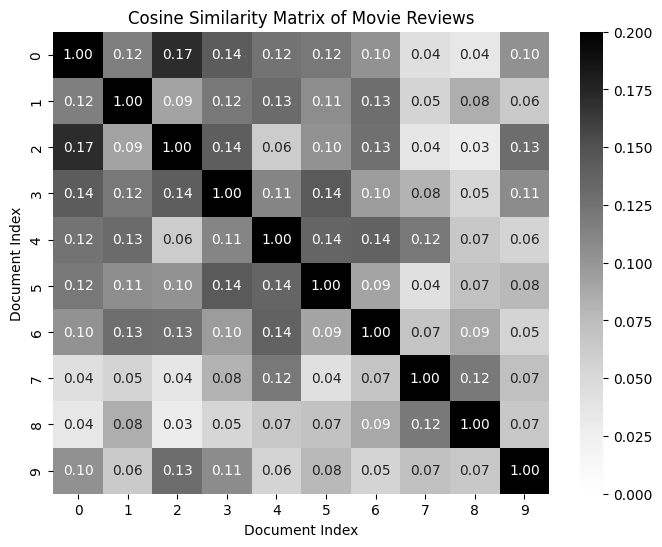

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='Greys', fmt=".2f", vmin=0.0, vmax=0.2)
plt.title("Cosine Similarity Matrix of Movie Reviews")
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.show()

Mounted at /content/drive


In [224]:
import glob

glob.glob("/content/drive/MyDrive/Colab Notebooks/MSDS 453/*.ipynb")

['/content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS 453 NLP D3.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/term_extraction_exploration.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/Untitled0.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/term_extraction_exploration_MKN.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS453_Assignment_01_v28_20250923_MKN.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS453 Dimesionality_Reduction_MKN.ipynb',
 '/content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS 453 NLP D2.ipynb']

In [225]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS 453 NLP D3.ipynb" \
    --output "MSDS_453_NLP_D3.html"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS 453 NLP D3.ipynb to html
/usr/local/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 827655 bytes to /content/drive/MyDrive/Colab Notebooks/MSDS 453/MSDS_453_NLP_D3.html
